<a href="https://colab.research.google.com/github/apathyhill/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!











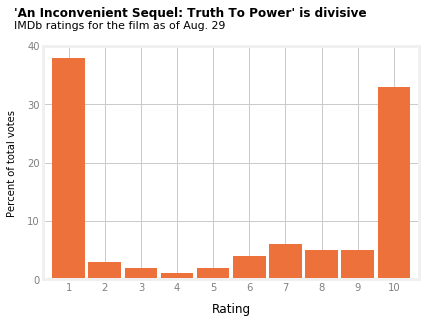

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.patch.set(facecolor='white')

ax = fake.plot.bar(color="#ED713A", width=0.9)
ax.set(facecolor='white')

ax.text(x=-1.5, y=45, s="'An Inconvenient Sequel: Truth To Power' is divisive", fontweight='bold', fontsize=12);
ax.text(x=-1.5, y=43, s="IMDb ratings for the film as of Aug. 29", fontsize=11)

ax.set_ylabel("Percent of total votes", fontsize=10, labelpad=10)
ax.set_xlabel("Rating", fontsize=12, labelpad=10)

ax.set_xticklabels(range(1,11), rotation=0, alpha=0.5, fontsize=10)
ax.set_yticklabels(range(0, 50, 10), alpha=0.5, fontsize=10)
ax.set_yticks(range(0, 50, 10))

plt.show()

In [263]:
import altair as alt
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv")
df["Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Salad"] = df["Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad"] + df["Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad"]

colors = ["#8AA9D8", "#E39FC6", "#5BC4BE", "#FFD550", "#F8A17C", "#AED477"]
var = ["Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese",
        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash", 
         "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Salad",
        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole",
        "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread",
       "Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits"
       ]


def get_most(df_regions):
  # Get rehions
  regions = list(df["US Region"].dropna().unique())
  
  # Turn Yes/No to 1/0
  for v in var:
    df[v] = [pd.isna(i) for i in df[v]]
  
  # Find means and std. devs of whole country
  means = {}
  for v in var:
      means[v] = {"mean": df[v].mean(), "dev": df[v].std()}
  print (means)
  
  # Compare average of each region with the mean
  dish_dict = {}
  for region in regions:
    df_region = df[df["US Region"] == region]
    diff_max = 0
    dish = 0
    for n, v in enumerate(var):
      z = (means[v]["mean"] - df_region[v].mean()) / means[v]["dev"]
      if z > diff_max:
        diff_max = z
        dish = n
    dish_dict[region] = dish
  return dish_dict

region_dict = get_most(df_regions)
print(df_regions)

# I feel bad for anyone trying to read this code


{'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese': {'mean': 0.8052930056710775, 'dev': 0.3961622413176572}, 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash': {'mean': 0.8383742911153119, 'dev': 0.36828118984992125}, 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Salad': {'mean': 0.9319470699432892, 'dev': 0.25195581041712206}, 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole': {'mean': 0.3516068052930057, 'dev': 0.4776977550261777}, 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread': {'mean': 0.777882797731569, 'dev': 0.4158661015803425}, 'Which of these side dishes aretypically served at your Thanksgiving dinner? Pleas

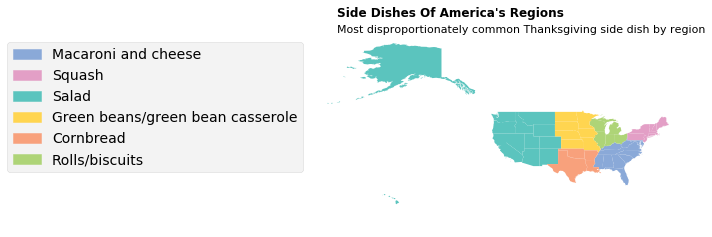

In [293]:
import geopandas as gpd
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, 1)
fig.patch.set(facecolor='white')

# Load map
usa = gpd.read_file("states.shp")

# Draw every region
for region in region_dict:
  usa[usa["SUB_REGION"] == region].plot(ax=ax, color=colors[region_dict[region]])
ax.axis('off')
ax.text(x=-175, y=80, s="Side Dishes Of America's Regions", fontweight='bold', fontsize=12);
ax.text(x=-175, y=75, s="Most disproportionately common Thanksgiving side dish by region", fontsize=11);

# Make labels
labels = []
for n in range(len(colors)):
  c = colors[n]
  l = var[n].split(" - ")[-1]
  labels.append(mpatches.Patch(color=c, label=l))
plt.legend(handles=labels, bbox_to_anchor=(0, 1));


# STRETCH OPTIONS

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).


### 3) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here